# Domain: Banking

 

### Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:

* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer
* ZIP Code: Home Address ZIP 
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any.
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

### Import libraries

In [1]:
# ignore warning error
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Import datasets

In [3]:
# read csv file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Check datatype

In [4]:
# Columns datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
# Dataframe overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Shape

In [6]:
# DataFrame dimensionality
df.shape

(5000, 14)

### Check for Null Values

In [7]:
# Find total null values for each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Statistical summary

In [8]:
# Statisticallike percentile, mean, std, etc. 
df.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Check for Incorrect Imputation

In [9]:
# Based on the desribe result. We observe "experience" column have negative values 
# 52 negative values were found in experience column
df[df["Experience"]<0].shape

(52, 14)

In [10]:
# Show negative values found in the column
df[df["Experience"]<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [11]:
#Impute all negative values to zero on experience column 
df.loc[df['Experience'] < 0, ['Experience']] = 0

In [12]:
# There are no more negative values now after imputation
df[df["Experience"]<0].shape

(0, 14)

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

### Number of unique in each column

In [13]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage?


In [14]:
df[df['Mortgage']==0]['ID'].count()

3462

### Number of people with zero credit card spending per month?


In [15]:
df[df['CCAvg']==0]['ID'].count()

106

### Value counts of all categorical columns.


In [16]:
# return a series containing counts of unique values for category columns
cat_columns = ['Income', 'ZIP Code', 'Mortgage', 'CCAvg', 'Family','Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for col in df.columns:
    for i,j in enumerate(cat_columns): 
        print("Value counts of %s column:" %j)
        print (df[j].value_counts(normalize=True ))

Value counts of Income column:
44     0.0170
38     0.0168
81     0.0166
41     0.0164
39     0.0162
        ...  
189    0.0004
202    0.0004
205    0.0004
224    0.0002
218    0.0002
Name: Income, Length: 162, dtype: float64
Value counts of ZIP Code column:
94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64
Value counts of Mortgage column:
0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64
Value counts of CCAvg column:
0.30    0.0482
1.00    0.0462
0.20    0.0408
2.00    0.0376
0.80    0.0374
         ...  
2.75    0.0002
8.20    0.0002
9.30    0.0002
3.67    0.0002
5.33    0.0002
Name: CCAvg, Length: 108, dtype: float64
Value counts of Family column:
1    0.2944
2    0.259

Name: Mortgage, Length: 347, dtype: float64
Value counts of CCAvg column:
0.30    0.0482
1.00    0.0462
0.20    0.0408
2.00    0.0376
0.80    0.0374
         ...  
2.75    0.0002
8.20    0.0002
9.30    0.0002
3.67    0.0002
5.33    0.0002
Name: CCAvg, Length: 108, dtype: float64
Value counts of Family column:
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64
Value counts of Education column:
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64
Value counts of Personal Loan column:
0    0.904
1    0.096
Name: Personal Loan, dtype: float64
Value counts of Securities Account column:
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64
Value counts of CD Account column:
0    0.9396
1    0.0604
Name: CD Account, dtype: float64
Value counts of Online column:
1    0.5968
0    0.4032
Name: Online, dtype: float64
Value counts of CreditCard column:
0    0.706
1    0.294
Name: CreditCard, dtype: float64
Value counts of Income column:
44     0.

1    0.5968
0    0.4032
Name: Online, dtype: float64
Value counts of CreditCard column:
0    0.706
1    0.294
Name: CreditCard, dtype: float64
Value counts of Income column:
44     0.0170
38     0.0168
81     0.0166
41     0.0164
39     0.0162
        ...  
189    0.0004
202    0.0004
205    0.0004
224    0.0002
218    0.0002
Name: Income, Length: 162, dtype: float64
Value counts of ZIP Code column:
94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64
Value counts of Mortgage column:
0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64
Value counts of CCAvg column:
0.30    0.0482
1.00    0.0462
0.20    0.0408
2.00    0.0376
0.80    0.0374
         ...  
2.75    0.0002
8.20    0.0

### Univariate and Bivariate


In [17]:
df_x_cont_variables = df[[ 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Personal Loan']].copy()

print (" Mean of different columns by Personal Loan:")
print (" ------------------------------------------")
print (df_x_cont_variables.groupby('Personal Loan').mean())


print (" Median of different columns by Personal Loan:")
print (" ------------------------------------------")
print (df_x_cont_variables.groupby('Personal Loan').median())

 Mean of different columns by Personal Loan:
 ------------------------------------------
                     Age  Experience      Income    Family     CCAvg  \
Personal Loan                                                          
0              45.367257   20.148894   66.237389  2.373451  1.729009   
1              45.066667   19.843750  144.745833  2.612500  3.905354   

               Education    Mortgage  
Personal Loan                         
0               1.843584   51.789381  
1               2.233333  100.845833  
 Median of different columns by Personal Loan:
 ------------------------------------------
                Age  Experience  Income  Family  CCAvg  Education  Mortgage
Personal Loan                                                              
0              45.0        20.0    59.0     2.0    1.4        2.0       0.0
1              45.0        20.0   142.5     3.0    3.8        2.0       0.0


In [18]:
df_x_cat_variables = df[['Family','Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard','Personal Loan']].copy()

In [19]:
for i,j in enumerate(df_x_cat_variables):
    print (j)
    print ("--------------")
    print (pd.crosstab(df_x_cat_variables[j],df_x_cat_variables['Personal Loan'],normalize='columns')*100)
    print ("------------------------------------------------------------------------------------------------")

Family
--------------
Personal Loan          0          1
Family                             
1              30.199115  22.291667
2              26.327434  22.083333
3              19.402655  27.708333
4              24.070796  27.916667
------------------------------------------------------------------------------------------------
Education
--------------
Personal Loan          0          1
Education                          
1              44.314159  19.375000
2              27.013274  37.916667
3              28.672566  42.708333
------------------------------------------------------------------------------------------------
Securities Account
--------------
Personal Loan               0     1
Securities Account                 
0                   89.778761  87.5
1                   10.221239  12.5
------------------------------------------------------------------------------------------------
CD Account
--------------
Personal Loan          0          1
CD Account                

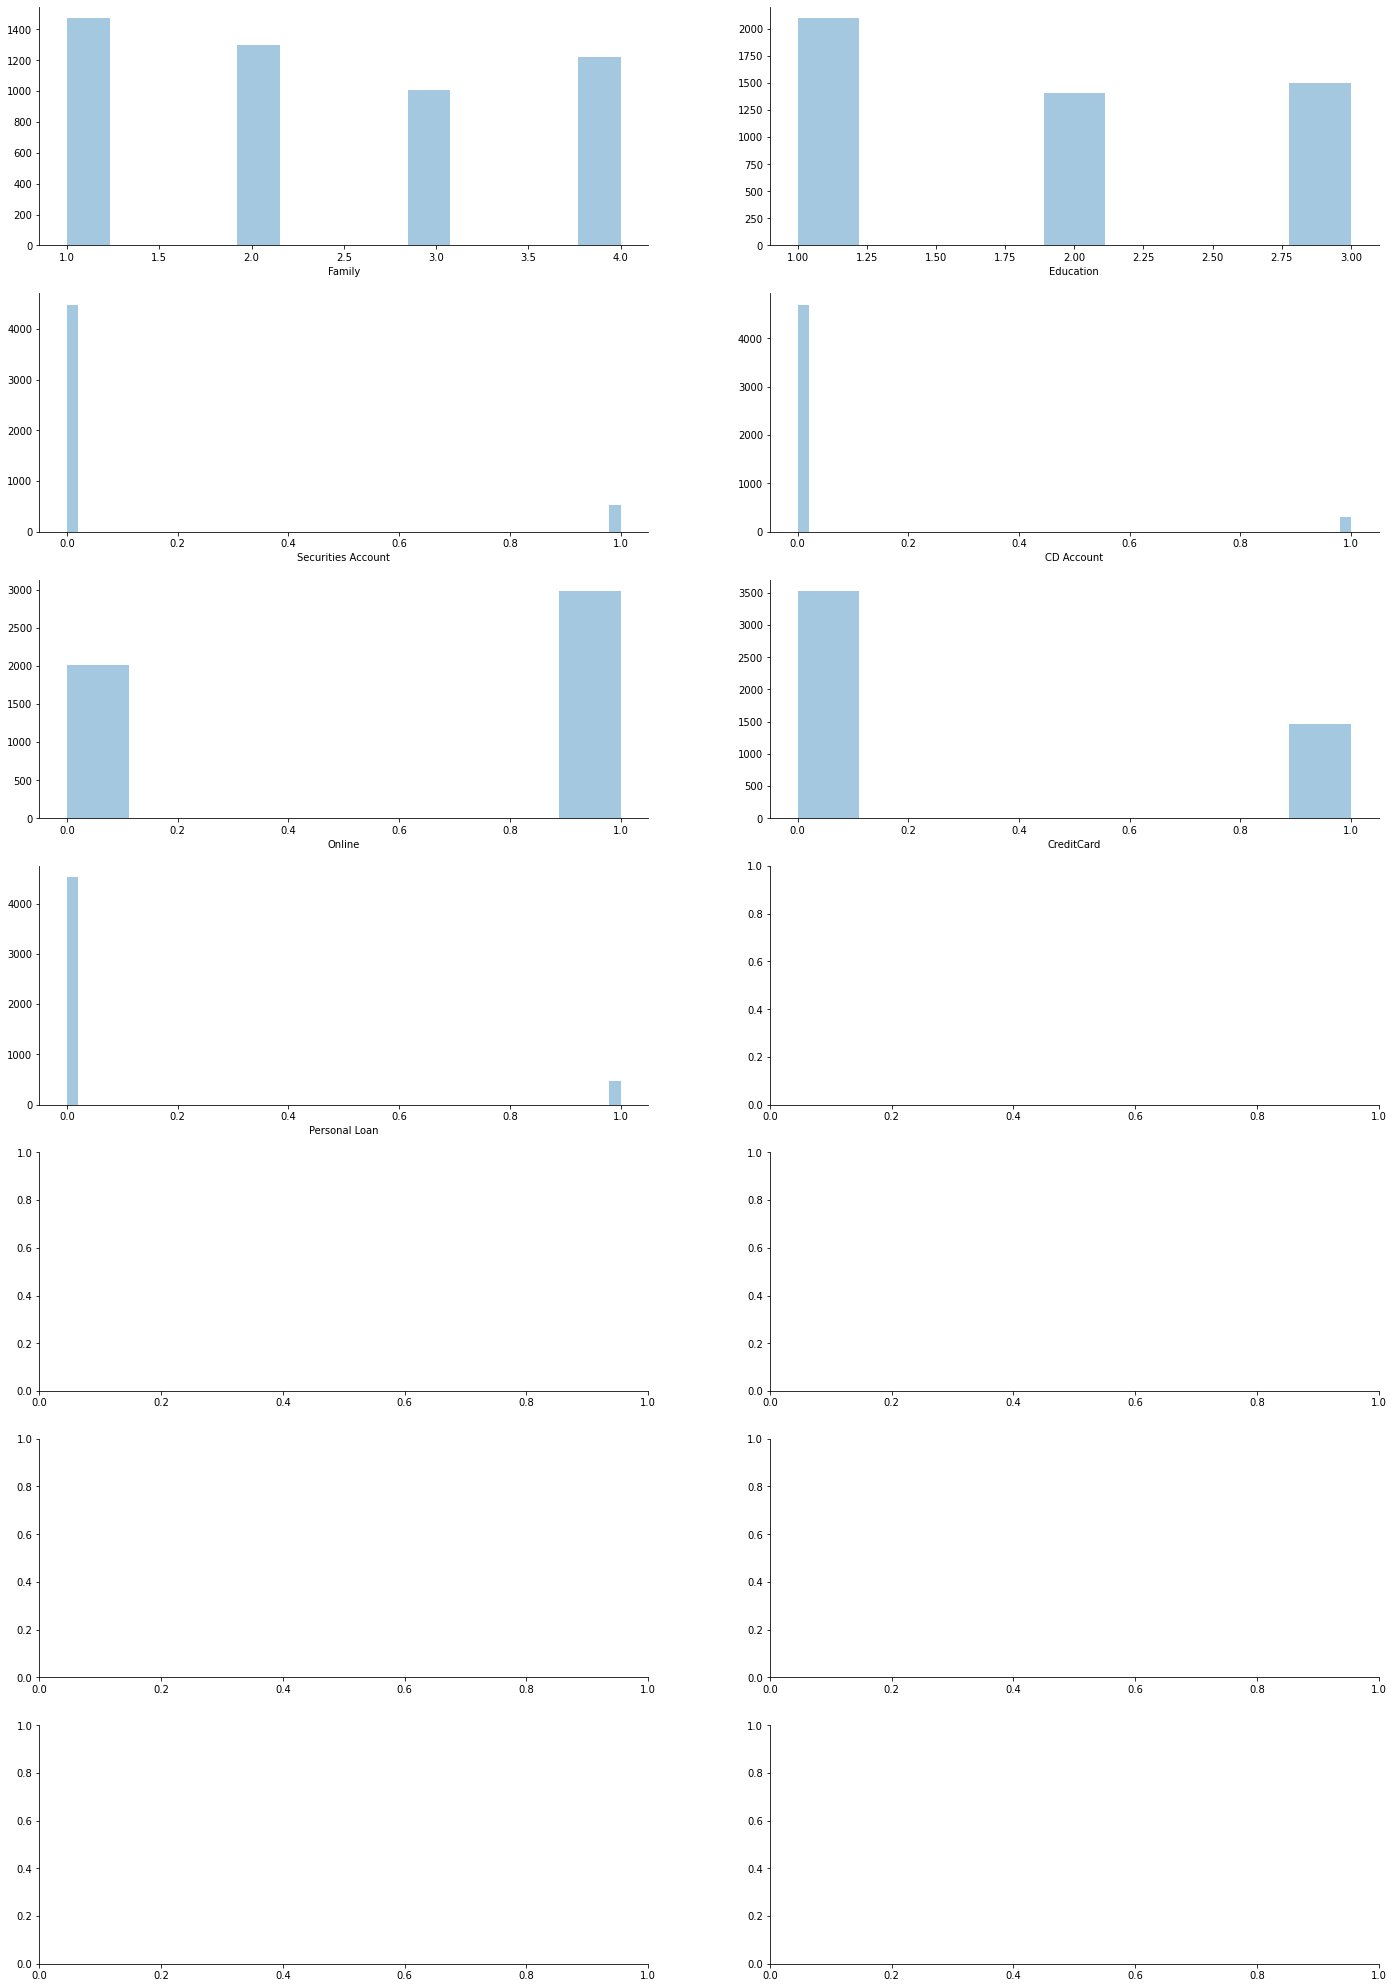

In [20]:
#Distplot of all columns
f, axes = plt.subplots(7, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,col in enumerate(df_x_cat_variables.columns):
    sns.distplot(df[col],ax=axes[i//2,i%2], kde=False)

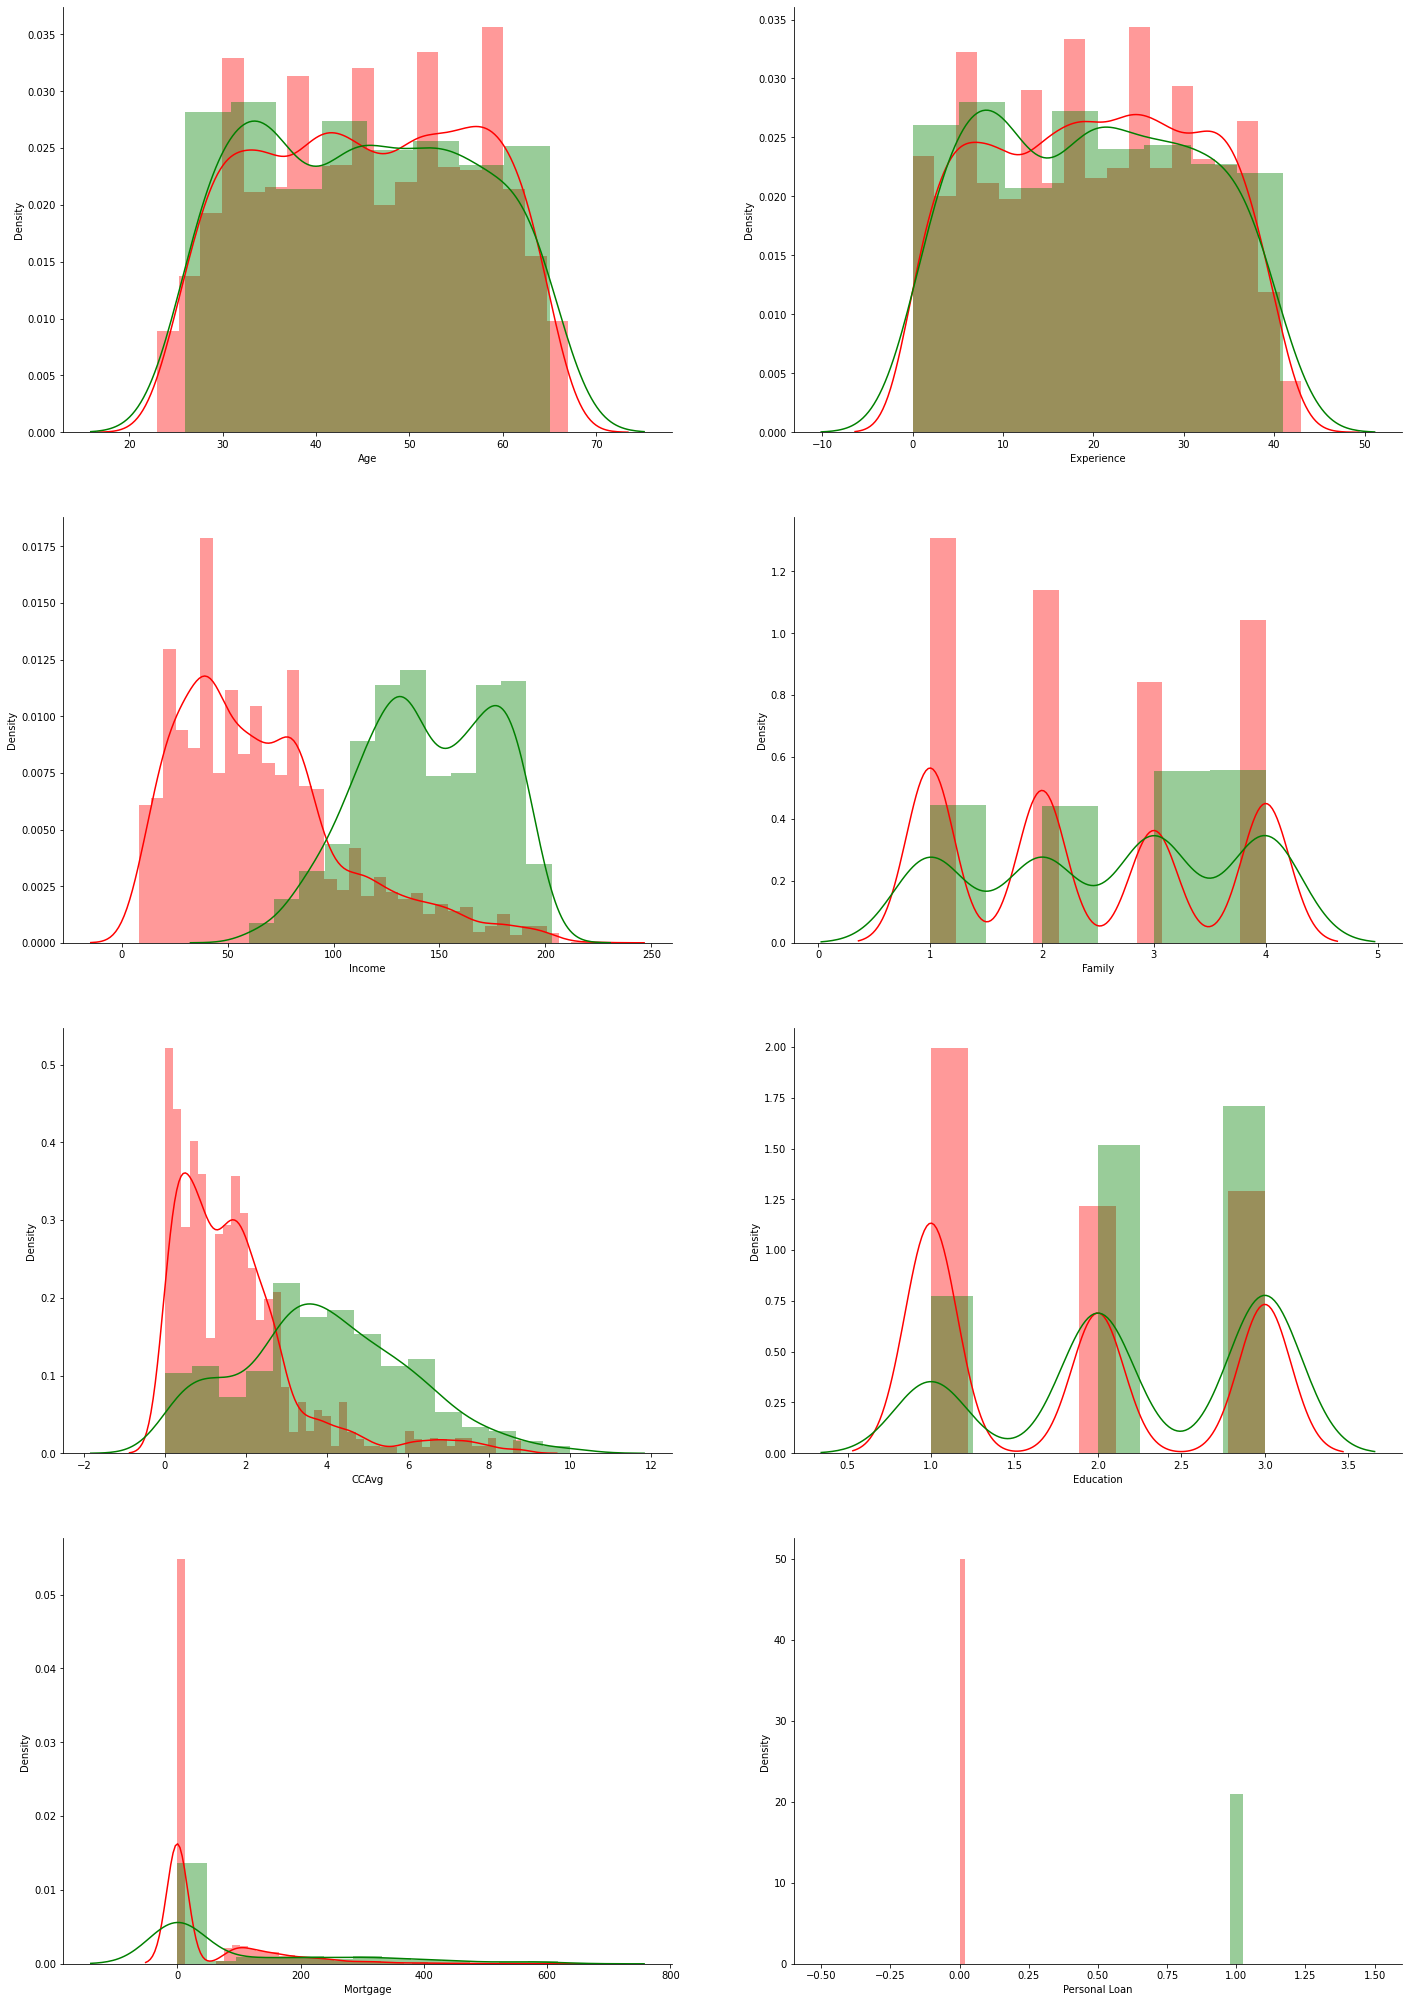

In [21]:
f, axes = plt.subplots(4, 2, figsize=(24, 36), sharex=False)
sns.despine(left=False)

for i,j in enumerate (df_x_cont_variables):
    sns.distplot(df[df['Personal Loan']==0][j],color='r',label=0,kde=True,ax=axes[i//2,i%2])
    sns.distplot(df[df['Personal Loan']==1][j],color='g',label=1,kde=True,ax=axes[i//2,i%2])

In [22]:
corr = df.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007858,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<AxesSubplot:>

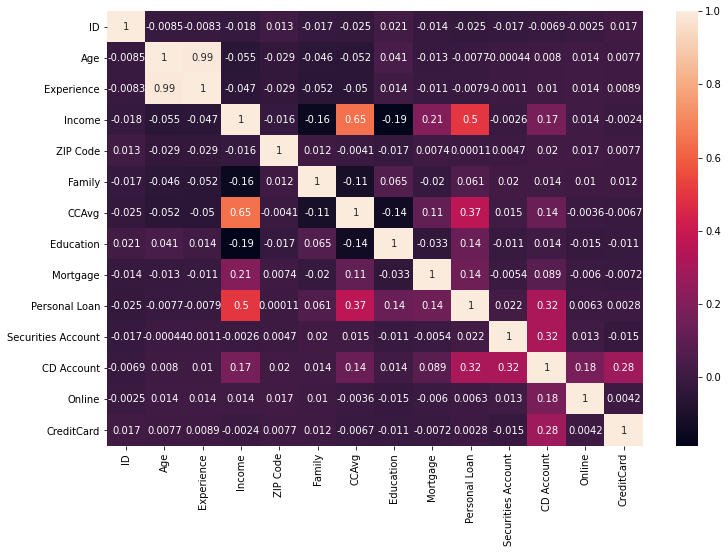

In [23]:
plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True)

- Observation from distplot and correlation heat map
     - Zip code column is highly skewed
     - Not many users have mortgages
     - High correlation in Experience and Age
     - Positive Correlation in Income and CCAvg  
     - Age & Experience are evenly distributed for users with loan or without loan

 ### Get data model ready

In [24]:
#verify datatype
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [25]:
# Changing the dtype to category for Family and Education
# convert integer dtype to category dtype
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

In [26]:
# verify family and education is category datatype now
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan            int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [27]:
# Drop 2 columns that are not required for the logistic regression
# ID column is unique and not required for regression model
# Zip Code is highly skewed and can be dropped from regression model
df=df.drop(['ID','ZIP Code'],axis=1)

In [28]:
#verify ID and Zip Code columns are dropped 
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [29]:
y=df [['Personal Loan']]

In [30]:
x=df [['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

In [31]:
x.shape

(5000, 11)

In [32]:
y.shape

(5000, 1)

In [33]:
x.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Securities Account       int64
CD Account               int64
Online                   int64
CreditCard               int64
dtype: object

In [34]:
# Adding dummy columns for all the categorical datatype columns
x=pd.get_dummies(x, drop_first=True)

In [35]:
x.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_2',
       'Family_3', 'Family_4', 'Education_2', 'Education_3'],
      dtype='object')

In [36]:
y.columns

Index(['Personal Loan'], dtype='object')

#### Data Model is now ready after imputing: 
* Family & education datatype from int64 to category
* Drop columns 'ID','ZIP Code' not required for logistic regression model
* Add dummy columns for all category tyope 

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [37]:
x=pd.get_dummies(x, drop_first=True)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [39]:
# total row count in original dataframe is 5000
df.shape

(5000, 12)

In [40]:
# x train data have 3500 which is 70% of the dataset 
x_train

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
1334,47,22,35,1.3,0,0,0,1,0,1,0,0,0,0
4768,38,14,39,2.0,0,0,0,1,0,0,0,0,1,0
65,59,35,131,3.8,0,0,0,1,1,0,0,0,0,0
177,29,3,65,1.8,244,0,0,0,0,0,0,1,1,0
4489,39,13,21,0.2,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,60,36,39,1.3,140,0,0,1,0,0,0,1,1,0
2763,55,31,13,0.7,0,0,0,1,0,0,0,1,0,0
905,46,22,28,1.0,84,0,0,1,1,0,0,0,0,0
3980,46,22,89,1.4,0,0,0,1,0,0,0,1,1,0


In [41]:
# y train data have 3500 which is 70% of the dataset 
y_train

,Personal Loan
1334,0
4768,0
65,0
177,0
4489,0
...,...
2895,0
2763,0
905,0
3980,0


In [42]:
# x test data have 1500 which is 30% of the dataset 
x_test

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
2764,31,5,84,2.90,105,0,0,0,1,0,0,0,0,1
4767,35,9,45,0.90,101,1,0,0,0,0,1,0,0,0
3814,34,9,35,1.30,0,0,0,0,0,0,1,0,0,0
3499,49,23,114,0.30,286,0,0,1,0,0,0,0,0,0
2735,36,12,70,2.60,165,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,63,38,32,1.50,0,0,0,0,0,0,0,0,1,0
3969,38,11,75,2.33,0,0,0,1,0,0,1,0,1,0
2535,50,25,21,0.70,129,0,0,0,0,1,0,0,0,1
1361,50,26,38,0.90,0,0,0,1,0,0,0,1,1,0


In [43]:
# y test data have 1500 which is 30% of the dataset 
y_test

,Personal Loan
2764,0
4767,0
3814,0
3499,0
2735,0
...,...
4140,0
3969,0
2535,0
1361,0


## 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [44]:
#import sklearn libraries for logistic regression preduction 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7,solver='lbfgs', max_iter=1500)
logreg.fit(x_train, y_train['Personal Loan']) # fit model using training data

LogisticRegression(max_iter=1500, random_state=7)

In [45]:
# predict after 1) getting data model ready and splitting training and test for x and y dataset
y_predict = logreg.predict(x_test)    

In [66]:
z = x_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Persoanal Loan'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Personal Loan,Predicted Persoanal Loan
2764,31,5,84,2.9,105,0,0,0,1,0,0,0,0,1,0,0
4767,35,9,45,0.9,101,1,0,0,0,0,1,0,0,0,0,0
3814,34,9,35,1.3,0,0,0,0,0,0,1,0,0,0,0,0
3499,49,23,114,0.3,286,0,0,1,0,0,0,0,0,0,0,0
2735,36,12,70,2.6,165,0,0,1,0,0,1,0,1,0,0,0


In [47]:
## confusion matrix function
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy: 0.9617142857142857

Testing accuracy: 0.9526666666666667

Confusion Matrix:


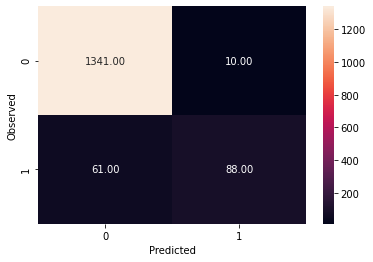

None

Recall: 0.5906040268456376

Precision: 0.8979591836734694

F1 Score: 0.7125506072874493

Roc Auc Score: 0.7916010511726337


In [64]:
# model performance result 
print("Training accuracy:",logreg.score(x_train,y_train))  
print()
print("Testing accuracy:",logreg.score(x_test, y_test))
print()
print("Confusion Matrix:")
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

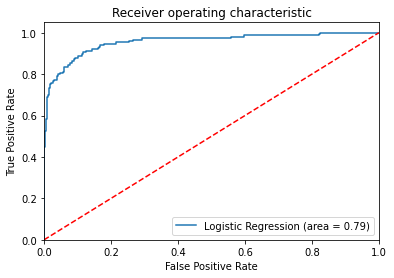

In [49]:
#AUC ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
# model score
model_score = logreg.score(x_test, y_test)
print(model_score)

0.9526666666666667


In [51]:
from numpy import sqrt
from numpy import argmax

# add a threshold
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.076480, G-Mean=0.894


## 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [62]:
 ## Show Importance or Coefficients 
fi = pd.DataFrame()
fi['Column'] = x_train.columns
fi['Coefficient'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coefficient',ascending=False)

,Column,Coefficient
13,Education_3,3.56
12,Education_2,3.33
6,CD Account,2.96
10,Family_3,2.13
11,Family_4,1.40
8,CreditCard,0.77
5,Securities Account,0.71
7,Online,0.47
3,CCAvg,0.22
9,Family_2,0.12


In [61]:
# Display test data with 71 rows where Observed Personal Loan is not equal to Predicted Personal Loan 
z [ z ['Observed Personal Loan'] !=z['Predicted Persoanal Loan']]

,Age,Experience,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Observed Personal Loan,Predicted Persoanal Loan
932,51,27,112,1.8,0,1,1,1,1,0,1,0,1,0,0,1
3347,65,41,78,2.0,0,0,1,1,1,0,1,0,0,1,0,1
4377,33,8,145,2.7,0,0,0,1,0,0,0,0,0,1,1,0
3988,59,35,85,3.4,0,0,1,0,1,0,0,0,0,1,1,0
3271,52,27,93,4.1,0,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,35,9,113,0.8,0,0,0,1,0,0,1,0,0,1,1,0
813,50,25,130,1.1,0,0,0,1,0,0,0,0,1,0,1,0
3766,59,35,108,3.8,304,0,0,1,0,0,0,1,1,0,1,0
421,28,3,115,3.1,0,0,0,0,0,0,0,1,1,0,1,0


## 6. Give conclusion related to the Business understanding of your model? (5 marks)

* Campaign to convert Thera Bank liability customers to personal loan customers.
* The goal of this classification model is to predict likelihood of liability customer buying personal loans
* Logistic Regression Model Evaluation metrics:
 * Training Accuracy: 0.9617142857142857
 * Testing Accuracy : 0.9526666666666667
 * Recall: 0.5906040268456376
 * Precision: 0.8979591836734694
 * F1 Score: 0.7125506072874493
 * Roc Auc Score: 0.7916010511726337 
 * Based on the metrics result as above, the model is performing well to predict the likelihood of customer buying personal loans. With the optimal threshold value of 0.076480, the probabilistic values can be converted to either 0 or 1 and decision can be taken whether to target the customer for the personal loan marketing or not. Coefficient for the education is high and people with higher education are expected to take more personal loan.
* This model can help Thera bank target the right customer to help reduce marketing cost and increase return on investment.